## Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## 

### Loading Required Libraries 

In [49]:
# Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
# Importing the file using a proper encoding

df = pd.read_csv('AviationData.csv', encoding='latin-1')

# Print the first five rows
df.head()

c:\Users\NOEL\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [51]:
# Print the last five rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [52]:
# Check the number of rows and columns in the dataset
df.shape

(88889, 31)

In [53]:
# Provides us with the summary of the data(Characteristics of the DataFrame)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Data Cleaning

In [54]:
# Check which columns we have
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [55]:
# Standardizing Column Names
df.columns = df.columns.str.title().str.replace(".", "_")

In [56]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_Damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_Of_Engines', 'Engine_Type', 'Far_Description',
       'Schedule', 'Purpose_Of_Flight', 'Air_Carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_Phase_Of_Flight', 'Report_Status',
       'Publication_Date'],
      dtype='object')

In [57]:
# Check for duplicates
df.duplicated().value_counts()  # False means there are no Duplicates


False    88889
dtype: int64

In [58]:
# Convert date columns to datetime format

df['Event_Date'] = pd.to_datetime(df['Event_Date'], errors = 'coerce')
df['Publication_Date'] = pd.to_datetime(df['Publication_Date'], errors = 'coerce')

In [59]:
# Checking for outliers
df.describe()

,Number_Of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [60]:
# Convert numerical columns

df["Number_Of_Engines"] = pd.to_numeric(df["Number_Of_Engines"], errors="coerce").astype("Int64")
injury_columns = ["Total_Fatal_Injuries", "Total_Serious_Injuries", "Total_Minor_Injuries", "Total_Uninjured"]
df[injury_columns] = df[injury_columns].fillna(0).astype(int)


In [61]:
injury_severity = df["Injury_Severity"].value_counts()
injury_severity.head(20)

Non-Fatal      67357
Fatal(1)        6167
Fatal           5262
Fatal(2)        3711
Incident        2219
Fatal(3)        1147
Fatal(4)         812
Fatal(5)         235
Minor            218
Serious          173
Fatal(6)         161
Unavailable       96
Fatal(7)          56
Fatal(8)          51
Fatal(10)         32
Fatal(9)          18
Fatal(14)         11
Fatal(11)         10
Fatal(13)          9
Fatal(12)          8
Name: Injury_Severity, dtype: int64

In [62]:
severity_mapping = {
    "Fatal": "Fatal",
    "Fatal Injury": "Fatal",
    "Non-Fatal": "Non-Fatal",
    "Serious": "Serious Injury",
    "Serious Injury": "Serious Injury",
    "Minor": "Minor Injury",
    "Minor Injury": "Minor Injury",
    "Incident": "No Injury",
    "None": "No Injury",
    "Unknown": "Unknown"
}

df["Injury_Severity"] = df["Injury_Severity"].map(severity_mapping)

# Assign Risk Scores (Higher score = More severe accident)
risk_scores = {
    "Fatal": 5,
    "Serious Injury": 4,
    "Minor Injury": 3,
    "Non-Fatal": 2,
    "No Injury": 1,
    "Unknown": 0
}

df["Injury_Risk_Score"] = df["Injury_Severity"].map(risk_scores)


In [63]:
# Check for missing values
df.isnull().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38640
Airport_Name              36099
Injury_Severity           13660
Aircraft_Damage            3194
Aircraft_Category         56602
Registration_Number        1317
Make                         63
Model                        92
Amateur_Built               102
Number_Of_Engines          6084
Engine_Type                7077
Far_Description           56866
Schedule                  76307
Purpose_Of_Flight          6192
Air_Carrier               72241
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition          4492
Broad_Phase_Of_Flight     27165
Report_Status              6381
Publication_Date          13771
Injury_R

In [64]:
# Drop irrelevant columns
# Drop unnecessary columns
df = df.drop(columns=['Accident_Number', 'Location', 'Country', 
                      'Latitude', 'Longitude', 'Airport_Code', 'Airport_Name', 'Registration_Number', 
                      'Amateur_Built', 'Far_Description', 'Schedule', 'Air_Carrier', 'Publication_Date'])

In [65]:
df

,Event_Id,Investigation_Type,Event_Date,Injury_Severity,Aircraft_Damage,Aircraft_Category,Make,Model,Number_Of_Engines,Engine_Type,Purpose_Of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Injury_Risk_Score
0,20001218X45444,Accident,1948-10-24,NaN,Destroyed,NaN,Stinson,108-3,1,Reciprocating,Personal,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,1962-07-19,NaN,Destroyed,NaN,Piper,PA24-180,1,Reciprocating,Personal,4,0,0,0,UNK,Unknown,Probable Cause,NaN
2,20061025X01555,Accident,1974-08-30,NaN,Destroyed,NaN,Cessna,172M,1,Reciprocating,Personal,3,0,0,0,IMC,Cruise,Probable Cause,NaN
3,20001218X45448,Accident,1977-06-19,NaN,Destroyed,NaN,Rockwell,112,1,Reciprocating,Personal,2,0,0,0,IMC,Cruise,Probable Cause,NaN
4,20041105X01764,Accident,1979-08-02,NaN,Destroyed,NaN,Cessna,501,<NA>,NaN,Personal,1,2,0,0,VMC,Approach,Probable Cause,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,Minor Injury,NaN,NaN,PIPER,PA-28-151,<NA>,NaN,Personal,0,1,0,0,NaN,NaN,NaN,3.0
88885,20221227106494,Accident,2022-12-26,NaN,NaN,NaN,BELLANCA,7ECA,<NA>,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,2022-12-26,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1,NaN,Personal,0,0,0,1,VMC,NaN,NaN,2.0
88887,20221227106498,Accident,2022-12-26,NaN,NaN,NaN,CESSNA,210N,<NA>,NaN,Personal,0,0,0,0,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

`.mode()` -- the mode of the column
`.count()` -- the count of the total number of entries in a column
`.std()` -- the standard deviation for the column
`.var()` -- the variance for the column
`.sum()` -- the sum of all values in the column
 


# Aircraft make and model

In [66]:
make_model = df[["Make", "Model"]].value_counts()
make_model.head(30)

Make     Model     
Cessna   152           2168
         172           1254
         172N           996
Piper    PA-28-140      812
Cessna   150            716
         172M           667
         172P           597
         150M           539
Piper    PA-18          539
         PA-28-161      502
         PA-28-180      499
CESSNA   172            499
Cessna   180            494
Piper    PA-28-181      476
Cessna   182            464
Piper    PA-38-112      444
         PA-18-150      437
BOEING   737            435
Bell     206B           421
Cessna   150L           410
Grumman  G-164A         353
Piper    PA-32-300      325
Cessna   140            321
Piper    PA-24-250      310
Cessna   170B           309
Piper    PA-23-250      296
         PA-28R-200     294
Beech    A36            293
Cessna   182P           293
         A188B          286
dtype: int64

# Aircraft make vs model vs injury severity

In [67]:
injury_severity_per_make_model = df[["Make", "Model", "Injury_Severity"]].value_counts()
injury_severity_per_make_model.head(50)

Make     Model       Injury_Severity
Cessna   152         Non-Fatal          1933
         172         Non-Fatal          1135
         172N        Non-Fatal           820
         150         Non-Fatal           653
Piper    PA-28-140   Non-Fatal           652
Cessna   172M        Non-Fatal           551
         172P        Non-Fatal           498
Piper    PA-18       Non-Fatal           484
Cessna   150M        Non-Fatal           479
         180         Non-Fatal           453
         182         Non-Fatal           403
Piper    PA-28-161   Non-Fatal           399
         PA-38-112   Non-Fatal           387
CESSNA   172         Non-Fatal           382
Piper    PA-18-150   Non-Fatal           373
         PA-28-180   Non-Fatal           370
         PA-28-181   Non-Fatal           343
Grumman  G-164A      Non-Fatal           336
Cessna   150L        Non-Fatal           336
Bell     206B        Non-Fatal           324
Cessna   140         Non-Fatal           300
         170B     

In [68]:
aircraft_make_model_category = df[["Make", "Model", "Aircraft_Category"]].value_counts()
aircraft_make_model_category.head(50)

Make                         Model      Aircraft_Category
CESSNA                       172        Airplane             493
Cessna                       172        Airplane             374
BOEING                       737        Airplane             368
Cessna                       152        Airplane             257
CESSNA                       152        Airplane             193
                             182        Airplane             193
                             172S       Airplane             185
PIPER                        PA28       Airplane             179
CESSNA                       172N       Airplane             161
Cessna                       172N       Airplane             154
                             182        Airplane             152
                             150        Airplane             145
CIRRUS DESIGN CORP           SR22       Airplane             143
ROBINSON HELICOPTER COMPANY  R44 II     Helicopter           138
ROBINSON                     R44

In [69]:
aircraft_make_model_category_engine = df[["Make", "Model", "Aircraft_Category", "Number_Of_Engines", "Engine_Type"]].value_counts()
aircraft_make_model_category_engine.head(50)

Make                         Model      Aircraft_Category  Number_Of_Engines  Engine_Type  
CESSNA                       172        Airplane           1                  Reciprocating    370
Cessna                       172        Airplane           1                  Reciprocating    366
                             152        Airplane           1                  Reciprocating    254
CESSNA                       172S       Airplane           1                  Reciprocating    167
                             152        Airplane           1                  Reciprocating    161
Cessna                       172N       Airplane           1                  Reciprocating    152
CESSNA                       172N       Airplane           1                  Reciprocating    149
Cessna                       182        Airplane           1                  Reciprocating    144
                             150        Airplane           1                  Reciprocating    143
CESSNA           

In [70]:
aircraft_investigation_type = df[["Make", "Model", "Aircraft_Category", "Number_Of_Engines", "Engine_Type", "Investigation_Type"]].value_counts()
aircraft_investigation_type.head(50)

Make                         Model      Aircraft_Category  Number_Of_Engines  Engine_Type    Investigation_Type
CESSNA                       172        Airplane           1                  Reciprocating  Accident              370
Cessna                       172        Airplane           1                  Reciprocating  Accident              366
                             152        Airplane           1                  Reciprocating  Accident              250
CESSNA                       172S       Airplane           1                  Reciprocating  Accident              164
                             152        Airplane           1                  Reciprocating  Accident              160
Cessna                       172N       Airplane           1                  Reciprocating  Accident              151
CESSNA                       172N       Airplane           1                  Reciprocating  Accident              149
Cessna                       182        Airplane       

In [71]:
aircraft_investigation_type_flight = df[["Make", "Model", "Number_Of_Engines", "Engine_Type", "Investigation_Type", "Purpose_Of_Flight"]].value_counts()
aircraft_investigation_type_flight.head(50)

Make      Model       Number_Of_Engines  Engine_Type    Investigation_Type  Purpose_Of_Flight 
Cessna    152         1                  Reciprocating  Accident            Instructional         1338
          172         1                  Reciprocating  Accident            Personal               841
          152         1                  Reciprocating  Accident            Personal               736
          172N        1                  Reciprocating  Accident            Personal               607
Piper     PA-28-140   1                  Reciprocating  Accident            Personal               603
Cessna    172M        1                  Reciprocating  Accident            Personal               457
          150         1                  Reciprocating  Accident            Personal               430
Piper     PA-28-180   1                  Reciprocating  Accident            Personal               411
Cessna    180         1                  Reciprocating  Accident            Perso

In [72]:
investigation_type = df["Investigation_Type"].value_counts()
investigation_type.head(50)

Accident    85015
Incident     3874
Name: Investigation_Type, dtype: int64

In [73]:
broad_phase_of_flight = df["Broad_Phase_Of_Flight"].value_counts()
broad_phase_of_flight.head(50)

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad_Phase_Of_Flight, dtype: int64

In [74]:
investigation_type_broad_phase_of_flight = df[["Investigation_Type", "Broad_Phase_Of_Flight"]].value_counts()
investigation_type_broad_phase_of_flight.head(50)

Investigation_Type  Broad_Phase_Of_Flight
Accident            Landing                  15074
                    Takeoff                  12133
                    Cruise                    9904
                    Maneuvering               8107
                    Approach                  6338
                    Climb                     1850
                    Taxi                      1783
                    Descent                   1778
                    Go-around                 1338
                    Standing                   854
                    Unknown                    536
Incident            Cruise                     365
                    Takeoff                    360
                    Landing                    354
                    Approach                   208
                    Climb                      184
                    Taxi                       175
Accident            Other                      111
Incident            Descent             

In [75]:
make_investigation_type_broad_phase_of_flight = df[["Make", "Investigation_Type", "Broad_Phase_Of_Flight"]].value_counts()
make_investigation_type_broad_phase_of_flight.head(50)

Make         Investigation_Type  Broad_Phase_Of_Flight
Cessna       Accident            Landing                  6407
                                 Takeoff                  3825
                                 Cruise                   3396
Piper        Accident            Landing                  2732
                                 Takeoff                  2387
Cessna       Accident            Approach                 2108
Piper        Accident            Cruise                   2027
Cessna       Accident            Maneuvering              1804
Piper        Accident            Approach                 1245
                                 Maneuvering              1064
Beech        Accident            Landing                   873
                                 Takeoff                   816
Cessna       Accident            Taxi                      710
Beech        Accident            Cruise                    703
Cessna       Accident            Descent                   629


<ipython-input-76-7d034d295e19>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_makes.index, rotation=45, ha="right")


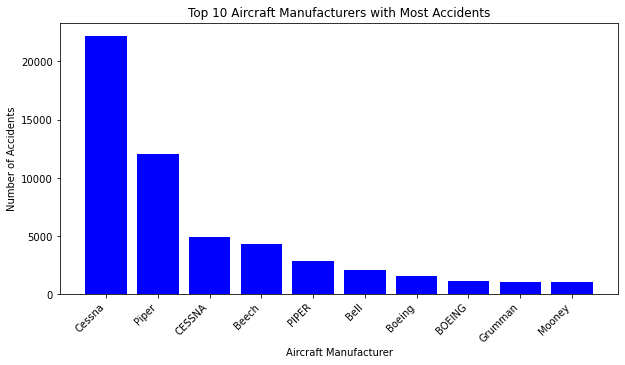

In [76]:
# Top 10 Aircraft Manufacturers with Most Accidents
fig, ax = plt.subplots(figsize=(10, 5))
top_makes = df["Make"].value_counts().head(10)
ax.bar(top_makes.index, top_makes.values, color="blue")
ax.set_xticklabels(top_makes.index, rotation=45, ha="right")
ax.set_title("Top 10 Aircraft Manufacturers with Most Accidents")
ax.set_xlabel("Aircraft Manufacturer")
ax.set_ylabel("Number of Accidents")
plt.show()



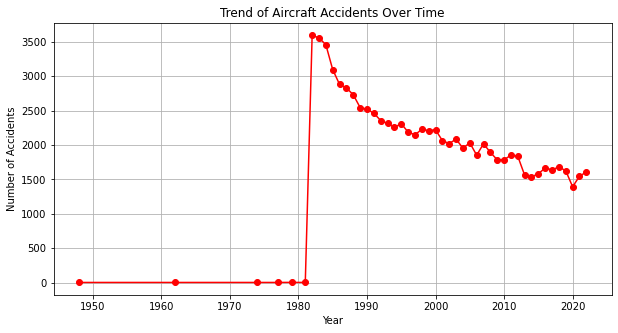

In [77]:
# Trend of Accidents Over Time
fig, ax = plt.subplots(figsize=(10, 5))
accident_trend = df.groupby(df["Event_Date"].dt.year).size()
ax.plot(accident_trend.index, accident_trend.values, marker="o", color="red")
ax.set_title("Trend of Aircraft Accidents Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Accidents")
ax.grid(True)
plt.show()

<ipython-input-78-cae835c5ee6d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(injury_counts.index, rotation=45, ha="right")


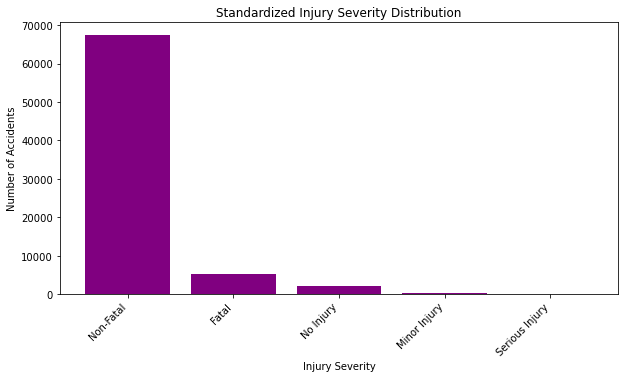

In [78]:
# Standardized Injury Severity Distribution
fig, ax = plt.subplots(figsize=(10, 5))
injury_counts = df["Injury_Severity"].value_counts()
ax.bar(injury_counts.index, injury_counts.values, color="purple")
ax.set_xticklabels(injury_counts.index, rotation=45, ha="right")
ax.set_title("Standardized Injury Severity Distribution")
ax.set_xlabel("Injury Severity")
ax.set_ylabel("Number of Accidents")
plt.show()

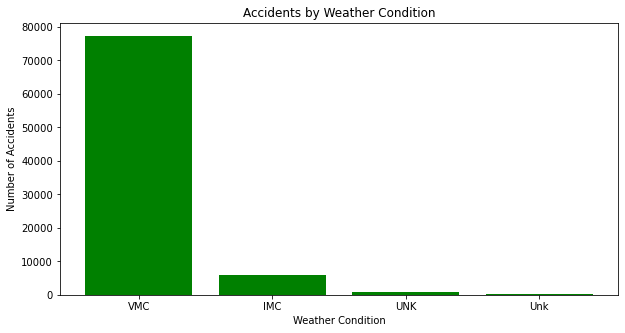

In [79]:
# Accidents by Weather Condition
fig, ax = plt.subplots(figsize=(10, 5))
weather_condition_counts = df["Weather_Condition"].value_counts().dropna()
ax.bar(weather_condition_counts.index, weather_condition_counts.values, color="green")
ax.set_title("Accidents by Weather Condition")
ax.set_xlabel("Weather Condition")
ax.set_ylabel("Number of Accidents")
plt.show()

<ipython-input-80-42d25579bdcb>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(phase_of_flight_counts.index, rotation=45, ha="right")


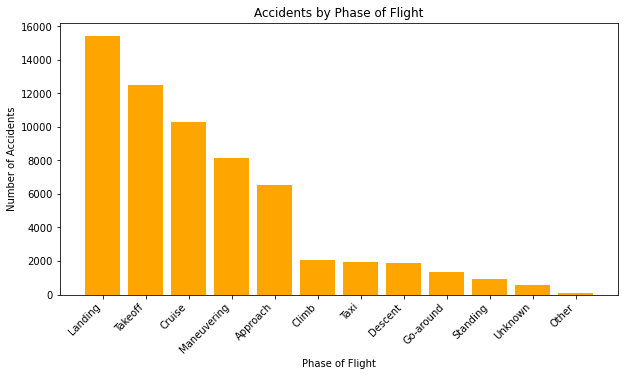

In [80]:
# Accidents by Phase of Flight
fig, ax = plt.subplots(figsize=(10, 5))
phase_of_flight_counts = df["Broad_Phase_Of_Flight"].value_counts().dropna()
ax.bar(phase_of_flight_counts.index, phase_of_flight_counts.values, color="orange")
ax.set_xticklabels(phase_of_flight_counts.index, rotation=45, ha="right")
ax.set_title("Accidents by Phase of Flight")
ax.set_xlabel("Phase of Flight")
ax.set_ylabel("Number of Accidents")
plt.show()